# Tweet Extraction

Using Opensource python library for web scrapping of Twitter data. Since Twitter only allows 3200 past tweets from their developer account, we have to rely on external library for tweet extraction. 

In [ ]:

pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint


In [ ]:
pip install nest_asyncio

In [ ]:
#Importing required libraries
import twint
import nest_asyncio
nest_asyncio.apply()

In [ ]:
#We are using S&P 500 as our search term since S&P 500 represents the market movement. 
c = twint.Config()
c.Search = "S&P500" #search term for our research
c.Output = 'Tweets.csv'
c.Since = "2020-1-1" #Initial date of tweet collection
c.Until = "2020-8-30" #Final date of tweet collection.
c.Pandas = True
c.Lang= "en"
c.TranslateDest = "en"
c.User_full = True

In [ ]:
twint.run.Search(c)

In [ ]:
tweet = twint.storage.panda.Tweets_df

In [ ]:
tweet

Filtering tweets with English language 

In [ ]:
#Filtering tweets for English Language
Tweet_new = tweet[tweet['language']=="en"]

In [ ]:
Tweet_new

Storing tweets to excel file

In [ ]:
#Storing tweet dataset to an excel andf csv file
Tweet_new.to_excel("Tweets_final_en.xlsx")
Tweet_new.to_csv("Tweets_final_en.csv")

In [39]:
#Imoprting Tweets dataset from excel file 
import pandas as pd
Tweet_data = pd.read_excel("Tweets_en.xlsx")

In [40]:
Tweet_data

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2,1299857216367927303,1299857216367927303,1598745085000,2020-08-30 03:51:25,400,NaN,If the #Feds did it it has to be fakery ....Fe...,en,"['feds', 's']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,6,1299854188717813760,1299854188717813760,1598744363000,2020-08-30 03:39:23,400,NaN,Special Alert - Massive Dual Head and Shoulder...,en,"['sp500', 'nasdaq', 'volatility', 'gold', 'inv...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,15,1299848403279642629,1299819536162717696,1598742984000,2020-08-30 03:16:24,400,NaN,@loganbartlett I’ve got money in an S&amp;P500...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'loganbartlett', 'name': 'log...",NaN,NaN,NaN,NaN
3,18,1299845812516651008,1299819536162717696,1598742366000,2020-08-30 03:06:06,400,NaN,"@loganbartlett aboutta add ""investor"" in every...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'loganbartlett', 'name': 'log...",NaN,NaN,NaN,NaN
4,22,1299842236029513729,1298017854827237376,1598741513000,2020-08-30 02:51:53,400,NaN,"@LukeGromen Btw, why only 5% of assets if you ...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'LukeGromen', 'name': 'Luke G...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100516,230185,1212171998715162624,1212171998715162624,1577839300000,2020-01-01 04:41:40,400,NaN,CoT Index #SP500 | SP 500 STOCK INDEX - CHICA...,en,"['sp500', 'cotreport', 'cotindex', 'cftc', 'fu...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
100517,230186,1212171900333543425,1212171900333543425,1577839276000,2020-01-01 04:41:16,400,NaN,Long vs Short #SP500 | SP 500 STOCK INDEX - C...,en,"['sp500', 'cotreport', 'cftc', 'futures']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
100518,230188,1212169901692993537,1212153964206198789,1577838800000,2020-01-01 04:33:20,400,NaN,@TwiHusband @JoeBiden @brownone585 What damage...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TwiHusband', 'name': '(((Sta...",NaN,NaN,NaN,NaN
100519,230190,1212168709952851968,1080526870242779136,1577838516000,2020-01-01 04:28:36,400,NaN,2019 Performance Brokerage Account: +34.4% com...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [41]:
#storing the tweet content in a new dataframe
Tweet = Tweet_data["tweet"]

In [42]:
Tweet

0         If the #Feds did it it has to be fakery ....Fe...
1         Special Alert - Massive Dual Head and Shoulder...
2         @loganbartlett I’ve got money in an S&amp;P500...
3         @loganbartlett aboutta add "investor" in every...
4         @LukeGromen Btw, why only 5% of assets if you ...
                                ...                        
100516    CoT Index  #SP500 | SP 500 STOCK INDEX - CHICA...
100517    Long vs Short  #SP500 | SP 500 STOCK INDEX - C...
100518    @TwiHusband @JoeBiden @brownone585 What damage...
100519    2019 Performance Brokerage Account: +34.4% com...
100520    @WhiteHouse @realDonaldTrump Record debt level...
Name: tweet, Length: 100521, dtype: object

# Calculating Sentiment Scores

In [ ]:
pip install text2emotion


Using Opensocurce text2emotion library

In [ ]:
import text2emotion as te

In [ ]:
from time import sleep

In [ ]:
emotions = []
for text in Tweet:
    emotions.append(te.get_emotion(str(text)))

In [ ]:
emotion_series = pd.DataFrame.from_dict(emotions)


In [ ]:
emotion_series

In [ ]:
#Classifying tweets into 5 sentiments
Tweet_data["Happy"] = emotion_series.Happy
Tweet_data["Angry"] = emotion_series.Angry
Tweet_data["Surprise"] = emotion_series.Surprise
Tweet_data["Sad"] = emotion_series.Sad
Tweet_data["Fear"] = emotion_series.Fear

In [ ]:
Tweet_data

Usng Vader for sentiment score

In [ ]:

pip install vaderSentiment

In [ ]:
pip install pandas_datareader

In [64]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
import pandas_datareader.data as web
import xlsxwriter
import os

In [ ]:
#Calculating the tweet sentiment score

def sentimentScore(Tweet):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in Tweet:
        vs = analyzer.polarity_scores(sentence)
        print("Vader score: " + str(vs))
        #print("{: <65} {}".format(sentence, str(vs))) 
        results.append(vs)
    return results

In [ ]:
df_results = pd.DataFrame(sentimentScore(Tweet))

In [ ]:
df_results

In [ ]:
#Adding Vader score to our dataframe
df_tweets_1 = pd.merge(Tweet_data, df_results, left_index=True, right_index=True)

In [ ]:
df_tweets_1

Saving the final dataset for independent variable

In [ ]:
df_tweets_1.to_excel("Tweets_final_5_emo.xlsx")
df_tweets_1.to_csv("Tweets_final_5_emo.csv")

In [43]:
#Importing the dataset
import pandas as pd
df_tweets = pd.read_excel("Tweets_final_5_emo.xlsx")

In [44]:
df_tweets

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,trans_dest,Happy,Angry,Surprise,Sad,Fear,neg,neu,pos,compound
0,0,2,1299857216367927040,1299857216367927040,1598745085000,2020-08-30 03:51:25,400,NaN,If the #Feds did it it has to be fakery ....Fe...,en,...,NaN,0.00,0.00,0.00,0.00,1.00,0.000,1.000,0.000,0.0000
1,1,6,1299854188717814016,1299854188717814016,1598744363000,2020-08-30 03:39:23,400,NaN,Special Alert - Massive Dual Head and Shoulder...,en,...,NaN,0.00,0.00,0.50,0.00,0.50,0.000,0.841,0.159,0.5994
2,2,15,1299848403279642880,1299819536162717952,1598742984000,2020-08-30 03:16:24,400,NaN,@loganbartlett I’ve got money in an S&amp;P500...,en,...,NaN,0.00,0.33,0.33,0.00,0.33,0.000,0.900,0.100,0.2732
3,3,18,1299845812516651008,1299819536162717952,1598742366000,2020-08-30 03:06:06,400,NaN,"@loganbartlett aboutta add ""investor"" in every...",en,...,NaN,0.00,0.00,0.00,0.50,0.50,0.000,1.000,0.000,0.0000
4,4,22,1299842236029513984,1298017854827237120,1598741513000,2020-08-30 02:51:53,400,NaN,"@LukeGromen Btw, why only 5% of assets if you ...",en,...,NaN,0.00,0.00,0.33,0.33,0.33,0.077,0.803,0.120,0.2623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100516,100516,230185,1212171998715162880,1212171998715162880,1577839300000,2020-01-01 04:41:40,400,NaN,CoT Index #SP500 | SP 500 STOCK INDEX - CHICA...,en,...,NaN,0.00,0.00,0.00,0.00,1.00,0.000,0.952,0.048,0.1280
100517,100517,230186,1212171900333542912,1212171900333542912,1577839276000,2020-01-01 04:41:16,400,NaN,Long vs Short #SP500 | SP 500 STOCK INDEX - C...,en,...,NaN,0.00,0.33,0.00,0.00,0.67,0.000,0.952,0.048,0.1280
100518,100518,230188,1212169901692994048,1212153964206199040,1577838800000,2020-01-01 04:33:20,400,NaN,@TwiHusband @JoeBiden @brownone585 What damage...,en,...,NaN,0.00,0.14,0.43,0.14,0.29,0.335,0.634,0.032,-0.9533
100519,100519,230190,1212168709952851968,1080526870242779008,1577838516000,2020-01-01 04:28:36,400,NaN,2019 Performance Brokerage Account: +34.4% com...,en,...,NaN,0.17,0.00,0.00,0.50,0.33,0.092,0.840,0.069,-0.0129


In [45]:
#Creating Date column for averaging the sentiment scores daily
df_tweets['Datetime'] = pd.to_datetime(df_tweets["date"])
df_tweets['datetime'] = df_tweets['Datetime'].dt.date
df_tweet_new = df_tweets.set_index('Datetime')
df_tweet_new.drop(['date'], axis=1, inplace=True)
df_tweet_new.head()

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,...,Happy,Angry,Surprise,Sad,Fear,neg,neu,pos,compound,datetime
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-30 03:51:25,0,2,1299857216367927040,1299857216367927040,1598745085000,400,NaN,If the #Feds did it it has to be fakery ....Fe...,en,"['feds', 's']",...,0.0,0.00,0.00,0.00,1.00,0.000,1.000,0.000,0.0000,2020-08-30
2020-08-30 03:39:23,1,6,1299854188717814016,1299854188717814016,1598744363000,400,NaN,Special Alert - Massive Dual Head and Shoulder...,en,"['sp500', 'nasdaq', 'volatility', 'gold', 'inv...",...,0.0,0.00,0.50,0.00,0.50,0.000,0.841,0.159,0.5994,2020-08-30
2020-08-30 03:16:24,2,15,1299848403279642880,1299819536162717952,1598742984000,400,NaN,@loganbartlett I’ve got money in an S&amp;P500...,en,[],...,0.0,0.33,0.33,0.00,0.33,0.000,0.900,0.100,0.2732,2020-08-30
2020-08-30 03:06:06,3,18,1299845812516651008,1299819536162717952,1598742366000,400,NaN,"@loganbartlett aboutta add ""investor"" in every...",en,[],...,0.0,0.00,0.00,0.50,0.50,0.000,1.000,0.000,0.0000,2020-08-30
2020-08-30 02:51:53,4,22,1299842236029513984,1298017854827237120,1598741513000,400,NaN,"@LukeGromen Btw, why only 5% of assets if you ...",en,[],...,0.0,0.00,0.33,0.33,0.33,0.077,0.803,0.120,0.2623,2020-08-30


In [46]:
#Removing unecessary data and filtering only columns that will be used in the analysis 
df_tweet_new= df_tweets[['date','tweet','hashtags','cashtags','nretweets','retweet','compound','neg','neu','pos','Happy','Angry','Surprise','Sad','Fear','datetime']]

In [47]:
df_tweet_new.iloc[7698]

date                                       2020-08-12 00:08:06
tweet        Great day in our trading room:  https://t.co/L...
hashtags     ['es_f', 'emini', 'orderflow', 'orderbook', 'd...
cashtags                                               ['spy']
nretweets                                                    2
retweet                                                  False
compound                                                0.4404
neg                                                       0.07
neu                                                      0.799
pos                                                      0.131
Happy                                                     0.67
Angry                                                        0
Surprise                                                     0
Sad                                                          0
Fear                                                      0.33
datetime                                            202

In [48]:
df_tweet_new["tweet"].iloc[7698]

'Great day in our trading room:  https://t.co/L29yPwK0WV Chased #ES_F according our levels. No hindsight.   @bookmap_pro @spotgamma #emini #Orderflow #orderbook #daytrading #trading #sp500 #emini #SPY $spy #tradingroom  https://t.co/3UHQttNgym'

In [49]:
df_tweet_new.tail()

,date,tweet,hashtags,cashtags,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,datetime
100516,2020-01-01 04:41:40,CoT Index #SP500 | SP 500 STOCK INDEX - CHICA...,"['sp500', 'cotreport', 'cotindex', 'cftc', 'fu...",[],0,False,0.1280,0.000,0.952,0.048,0.00,0.00,0.00,0.00,1.00,2020-01-01
100517,2020-01-01 04:41:16,Long vs Short #SP500 | SP 500 STOCK INDEX - C...,"['sp500', 'cotreport', 'cftc', 'futures']",[],0,False,0.1280,0.000,0.952,0.048,0.00,0.33,0.00,0.00,0.67,2020-01-01
100518,2020-01-01 04:33:20,@TwiHusband @JoeBiden @brownone585 What damage...,[],[],0,False,-0.9533,0.335,0.634,0.032,0.00,0.14,0.43,0.14,0.29,2020-01-01
100519,2020-01-01 04:28:36,2019 Performance Brokerage Account: +34.4% com...,[],[],0,False,-0.0129,0.092,0.840,0.069,0.17,0.00,0.00,0.50,0.33,2020-01-01
100520,2020-01-01 04:26:36,@WhiteHouse @realDonaldTrump Record debt level...,['buffoontrump'],[],0,False,-0.8442,0.288,0.712,0.000,0.00,0.00,0.00,0.50,0.50,2020-01-01


In [50]:
#Scaling the data for analysis; Standardizing 
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['compound']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Compound_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-50-8b122666cc29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Compound_scaled'] = scaled_data


100521

In [51]:
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['Happy']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Happy_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-51-55e1a60b6fb3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Happy_scaled'] = scaled_data


100521

In [52]:
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['Angry']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Angry_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-52-c4a2f40e2f24>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Angry_scaled'] = scaled_data


100521

In [53]:
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['Surprise']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Surprise_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-53-ef67a1ff52ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Surprise_scaled'] = scaled_data


100521

In [54]:
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['Sad']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Sad_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-54-27777e3b77ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Sad_scaled'] = scaled_data


100521

In [55]:
from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_new[['Fear']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_new['Fear_scaled'] = scaled_data

df_tweet_new.tail()
len(df_tweet_new)

<ipython-input-55-c9ff9f40c5ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_new['Fear_scaled'] = scaled_data


100521

In [56]:
df_tweet_new.describe()

,nretweets,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
count,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,100521.000000,1.005210e+05,1.005210e+05,1.005210e+05,1.005210e+05,1.005210e+05,1.005210e+05
mean,0.803524,0.086045,0.037902,0.901038,0.061060,0.097552,0.054323,0.130668,0.118183,0.481209,3.150728e-14,-1.019564e-15,3.458622e-16,-1.174214e-14,-1.391670e-14,2.351532e-15
std,23.709332,0.381500,0.070555,0.109862,0.086393,0.210413,0.155722,0.228388,0.212527,0.366727,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-0.997700,0.000000,0.094000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.840764e+00,-4.636260e-01,-3.488487e-01,-5.721336e-01,-5.560860e-01,-1.312180e+00
25%,0.000000,0.000000,0.000000,0.832000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.255446e-01,-4.636260e-01,-3.488487e-01,-5.721336e-01,-5.560860e-01,-1.312180e+00
50%,0.000000,0.000000,0.000000,0.923000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-2.255446e-01,-4.636260e-01,-3.488487e-01,-5.721336e-01,-5.560860e-01,5.123976e-02
75%,0.000000,0.361200,0.059000,1.000000,0.107000,0.110000,0.000000,0.200000,0.200000,0.750000,7.212504e-01,5.915799e-02,-3.488487e-01,3.035734e-01,3.849742e-01,7.329495e-01
max,6483.000000,0.988100,0.906000,1.000000,0.789000,1.000000,1.000000,1.000000,1.000000,1.000000,2.364511e+00,4.288955e+00,6.072880e+00,3.806401e+00,4.149215e+00,1.414659e+00


In [57]:
#Daily means of sentiment score
Tweet_daily_mean=(df_tweet_new.groupby(df_tweet_new.datetime).mean())

Tweet_daily_mean.tail()
Tweet_daily_mean.head()

,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
datetime,,,,,,,,,,,,,,,,,
2020-01-01,1.087719,False,0.179340,0.033702,0.887912,0.078404,0.073860,0.069825,0.106404,0.143772,0.500614,0.244551,-0.112602,0.099546,-0.106242,0.120404,0.052914
2020-01-02,0.517699,False,0.144800,0.033018,0.898058,0.068947,0.084735,0.040221,0.145708,0.118717,0.521681,0.154011,-0.060918,-0.090559,0.065854,0.002512,0.110361
2020-01-03,2.324074,False,0.141044,0.043333,0.874701,0.081963,0.086759,0.040123,0.142994,0.114012,0.535401,0.144167,-0.051296,-0.091187,0.053970,-0.019624,0.147773
2020-01-04,1.191176,False,0.080401,0.035265,0.906654,0.058059,0.072647,0.050515,0.148897,0.107574,0.510000,-0.014792,-0.118365,-0.024457,0.079817,-0.049920,0.078508
2020-01-05,1.130000,False,0.069955,0.031640,0.915560,0.052790,0.055400,0.068400,0.130400,0.134500,0.451000,-0.042175,-0.200333,0.090398,-0.001173,0.076777,-0.082375


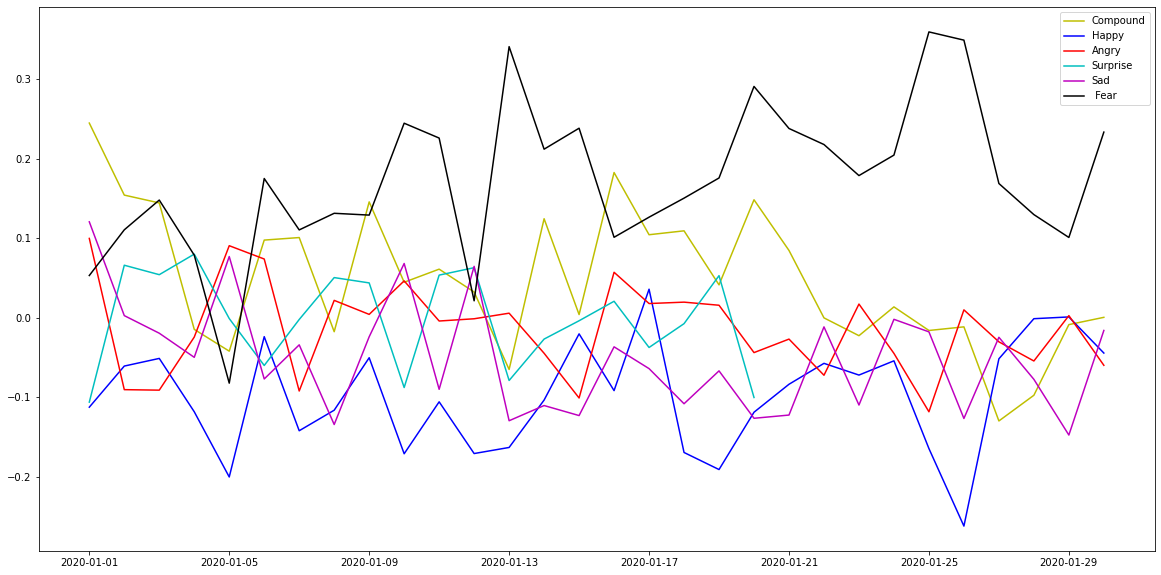

In [60]:
#Plotting the score
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Tweet_daily_mean["Compound_scaled"].iloc[:30],color="y")
plt.plot(Tweet_daily_mean["Happy_scaled"].iloc[:30],color="b")
plt.plot(Tweet_daily_mean["Angry_scaled"].iloc[:30],color="r")
plt.plot(Tweet_daily_mean["Surprise_scaled"].iloc[:20],color="c")
plt.plot(Tweet_daily_mean["Sad_scaled"].iloc[:30],color="m")
plt.plot(Tweet_daily_mean["Fear_scaled"].iloc[:30],color="k")
plt.legend(["Compound","Happy","Angry","Surprise","Sad"," Fear"])
plt.savefig("Graph_final.png")

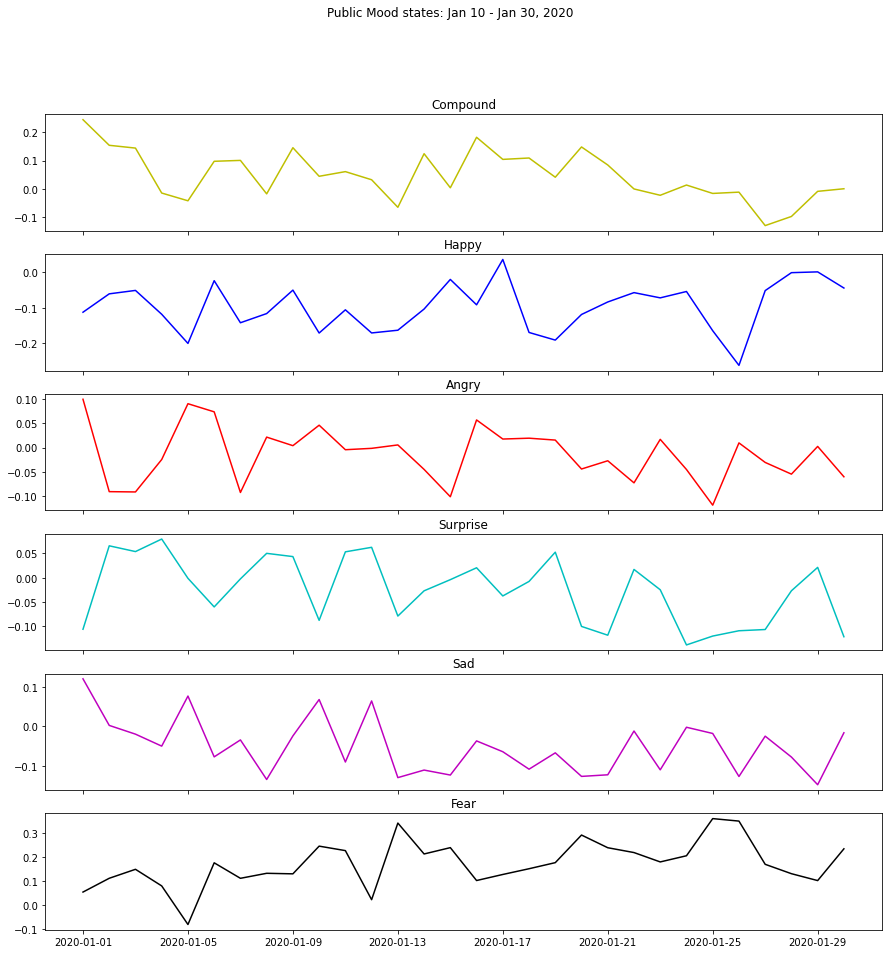

In [61]:
#Cross-Validating our sentiment series
fig, axs = plt.subplots(6,sharex=True,figsize=(15,15))
fig.suptitle('Public Mood states: Jan 10 - Jan 30, 2020')
axs[0].plot(Tweet_daily_mean["Compound_scaled"].iloc[:30],color="y")
axs[1].plot(Tweet_daily_mean["Happy_scaled"].iloc[:30],color="b")
axs[2].plot(Tweet_daily_mean["Angry_scaled"].iloc[:30],color="r")
axs[3].plot(Tweet_daily_mean["Surprise_scaled"].iloc[:30],color="c")
axs[4].plot(Tweet_daily_mean["Sad_scaled"].iloc[:30],color="m")
axs[5].plot(Tweet_daily_mean["Fear_scaled"].iloc[:30],color="k")
axs[0].set_title('Compound')
axs[1].set_title('Happy')
axs[2].set_title('Angry')
axs[3].set_title('Surprise')
axs[4].set_title('Sad')
axs[5].set_title('Fear')
fig.savefig('full_figure.png')

# Dependent Variable: Stock Price of S&P 500

In [65]:
#Extracting the tweets
stock = '^GSPC'
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,8,30)
df_stock = web.DataReader(stock,'yahoo',start,end)

In [66]:
df_stock.columns = ['High','Low','Open','Close','Volume_stock','Adj_Close_stock']

In [67]:
#Calculating the percentage change
df_stock['Daily_change_stock'] = (df_stock['Close'] - df_stock['Open'])

In [68]:
df_final = pd.concat([df_stock[['Volume_stock','Adj_Close_stock','Daily_change_stock']],\
                     Tweet_daily_mean], axis=1, sort=False)
df_final.tail()

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
2020-08-26,3.754360e+09,3478.729980,28.760010,0.942675,False,0.107898,0.033958,0.902510,0.063531,0.087325,0.056093,0.139703,0.128025,0.467367,0.057282,-0.048608,0.011368,0.039560,0.046312,-0.037744
2020-08-27,3.929560e+09,3484.550049,-0.589844,0.388430,False,0.131149,0.030585,0.897006,0.072419,0.102087,0.043905,0.120744,0.117975,0.457996,0.118228,0.021550,-0.066903,-0.043453,-0.000977,-0.063299
2020-08-28,3.855880e+09,3508.010010,13.320068,1.184915,False,0.146512,0.024861,0.914470,0.060676,0.090049,0.060462,0.138370,0.126034,0.445718,0.158501,-0.035662,0.039424,0.033724,0.036942,-0.096779
2020-08-29,NaN,NaN,NaN,1.086066,False,0.147967,0.022967,0.915857,0.061193,0.083934,0.045328,0.161721,0.137049,0.444713,0.162314,-0.064721,-0.057765,0.135969,0.088772,-0.099519
2020-08-30,NaN,NaN,NaN,1.588235,False,0.088326,0.030471,0.907412,0.062088,0.058824,0.028824,0.104706,0.077353,0.524118,0.005981,-0.184062,-0.163752,-0.113675,-0.192117,0.117005


In [69]:
df_final.isnull().sum()

Volume_stock          76
Adj_Close_stock       76
Daily_change_stock    76
nretweets              0
retweet                0
compound               0
neg                    0
neu                    0
pos                    0
Happy                  0
Angry                  0
Surprise               0
Sad                    0
Fear                   0
Compound_scaled        0
Happy_scaled           0
Angry_scaled           0
Surprise_scaled        0
Sad_scaled             0
Fear_scaled            0
dtype: int64

In [70]:
#Interploting missing data for weekends with their average
df_final[[ "Volume_stock", "Adj_Close_stock", "Daily_change_stock"]] = \
df_final[[ "Volume_stock", "Adj_Close_stock", "Daily_change_stock"]] \
.interpolate(method='linear', limit_direction='forward', axis=0)

In [71]:
df_final

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
2020-01-01,NaN,NaN,NaN,1.087719,False,0.179340,0.033702,0.887912,0.078404,0.073860,0.069825,0.106404,0.143772,0.500614,0.244551,-0.112602,0.099546,-0.106242,0.120404,0.052914
2020-01-02,3.458250e+09,3257.850098,13.180176,0.517699,False,0.144800,0.033018,0.898058,0.068947,0.084735,0.040221,0.145708,0.118717,0.521681,0.154011,-0.060918,-0.090559,0.065854,0.002512,0.110361
2020-01-03,3.461290e+09,3234.850098,8.489990,2.324074,False,0.141044,0.043333,0.874701,0.081963,0.086759,0.040123,0.142994,0.114012,0.535401,0.144167,-0.051296,-0.091187,0.053970,-0.019624,0.147773
2020-01-04,3.532217e+09,3238.660075,15.236654,1.191176,False,0.080401,0.035265,0.906654,0.058059,0.072647,0.050515,0.148897,0.107574,0.510000,-0.014792,-0.118365,-0.024457,0.079817,-0.049920,0.078508
2020-01-05,3.603143e+09,3242.470052,21.983317,1.130000,False,0.069955,0.031640,0.915560,0.052790,0.055400,0.068400,0.130400,0.134500,0.451000,-0.042175,-0.200333,0.090398,-0.001173,0.076777,-0.082375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26,3.754360e+09,3478.729980,28.760010,0.942675,False,0.107898,0.033958,0.902510,0.063531,0.087325,0.056093,0.139703,0.128025,0.467367,0.057282,-0.048608,0.011368,0.039560,0.046312,-0.037744
2020-08-27,3.929560e+09,3484.550049,-0.589844,0.388430,False,0.131149,0.030585,0.897006,0.072419,0.102087,0.043905,0.120744,0.117975,0.457996,0.118228,0.021550,-0.066903,-0.043453,-0.000977,-0.063299
2020-08-28,3.855880e+09,3508.010010,13.320068,1.184915,False,0.146512,0.024861,0.914470,0.060676,0.090049,0.060462,0.138370,0.126034,0.445718,0.158501,-0.035662,0.039424,0.033724,0.036942,-0.096779
2020-08-29,3.855880e+09,3508.010010,13.320068,1.086066,False,0.147967,0.022967,0.915857,0.061193,0.083934,0.045328,0.161721,0.137049,0.444713,0.162314,-0.064721,-0.057765,0.135969,0.088772,-0.099519


In [72]:
#Adding missing values with their mean
df_final['Daily_change_stock'].fillna(method="bfill", inplace=True)

In [73]:
df_final

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
2020-01-01,NaN,NaN,13.180176,1.087719,False,0.179340,0.033702,0.887912,0.078404,0.073860,0.069825,0.106404,0.143772,0.500614,0.244551,-0.112602,0.099546,-0.106242,0.120404,0.052914
2020-01-02,3.458250e+09,3257.850098,13.180176,0.517699,False,0.144800,0.033018,0.898058,0.068947,0.084735,0.040221,0.145708,0.118717,0.521681,0.154011,-0.060918,-0.090559,0.065854,0.002512,0.110361
2020-01-03,3.461290e+09,3234.850098,8.489990,2.324074,False,0.141044,0.043333,0.874701,0.081963,0.086759,0.040123,0.142994,0.114012,0.535401,0.144167,-0.051296,-0.091187,0.053970,-0.019624,0.147773
2020-01-04,3.532217e+09,3238.660075,15.236654,1.191176,False,0.080401,0.035265,0.906654,0.058059,0.072647,0.050515,0.148897,0.107574,0.510000,-0.014792,-0.118365,-0.024457,0.079817,-0.049920,0.078508
2020-01-05,3.603143e+09,3242.470052,21.983317,1.130000,False,0.069955,0.031640,0.915560,0.052790,0.055400,0.068400,0.130400,0.134500,0.451000,-0.042175,-0.200333,0.090398,-0.001173,0.076777,-0.082375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26,3.754360e+09,3478.729980,28.760010,0.942675,False,0.107898,0.033958,0.902510,0.063531,0.087325,0.056093,0.139703,0.128025,0.467367,0.057282,-0.048608,0.011368,0.039560,0.046312,-0.037744
2020-08-27,3.929560e+09,3484.550049,-0.589844,0.388430,False,0.131149,0.030585,0.897006,0.072419,0.102087,0.043905,0.120744,0.117975,0.457996,0.118228,0.021550,-0.066903,-0.043453,-0.000977,-0.063299
2020-08-28,3.855880e+09,3508.010010,13.320068,1.184915,False,0.146512,0.024861,0.914470,0.060676,0.090049,0.060462,0.138370,0.126034,0.445718,0.158501,-0.035662,0.039424,0.033724,0.036942,-0.096779
2020-08-29,3.855880e+09,3508.010010,13.320068,1.086066,False,0.147967,0.022967,0.915857,0.061193,0.083934,0.045328,0.161721,0.137049,0.444713,0.162314,-0.064721,-0.057765,0.135969,0.088772,-0.099519


In [74]:
df_final.head()

,Volume_stock,Adj_Close_stock,Daily_change_stock,nretweets,retweet,compound,neg,neu,pos,Happy,Angry,Surprise,Sad,Fear,Compound_scaled,Happy_scaled,Angry_scaled,Surprise_scaled,Sad_scaled,Fear_scaled
2020-01-01,NaN,NaN,13.180176,1.087719,False,0.179340,0.033702,0.887912,0.078404,0.073860,0.069825,0.106404,0.143772,0.500614,0.244551,-0.112602,0.099546,-0.106242,0.120404,0.052914
2020-01-02,3.458250e+09,3257.850098,13.180176,0.517699,False,0.144800,0.033018,0.898058,0.068947,0.084735,0.040221,0.145708,0.118717,0.521681,0.154011,-0.060918,-0.090559,0.065854,0.002512,0.110361
2020-01-03,3.461290e+09,3234.850098,8.489990,2.324074,False,0.141044,0.043333,0.874701,0.081963,0.086759,0.040123,0.142994,0.114012,0.535401,0.144167,-0.051296,-0.091187,0.053970,-0.019624,0.147773
2020-01-04,3.532217e+09,3238.660075,15.236654,1.191176,False,0.080401,0.035265,0.906654,0.058059,0.072647,0.050515,0.148897,0.107574,0.510000,-0.014792,-0.118365,-0.024457,0.079817,-0.049920,0.078508
2020-01-05,3.603143e+09,3242.470052,21.983317,1.130000,False,0.069955,0.031640,0.915560,0.052790,0.055400,0.068400,0.130400,0.134500,0.451000,-0.042175,-0.200333,0.090398,-0.001173,0.076777,-0.082375


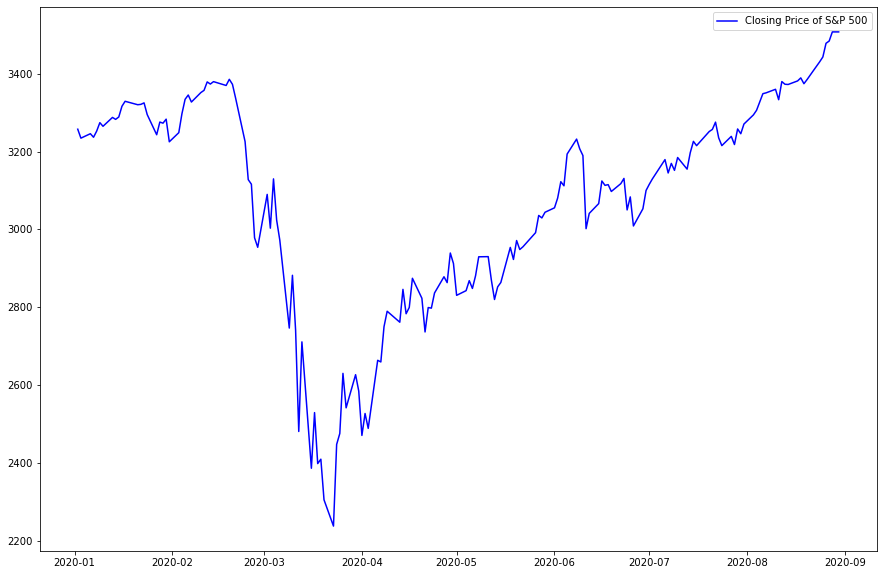

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df_final["Adj_Close_stock"],color="b")
plt.legend(["Closing Price of S&P 500"])
plt.savefig("Closing_price.png")

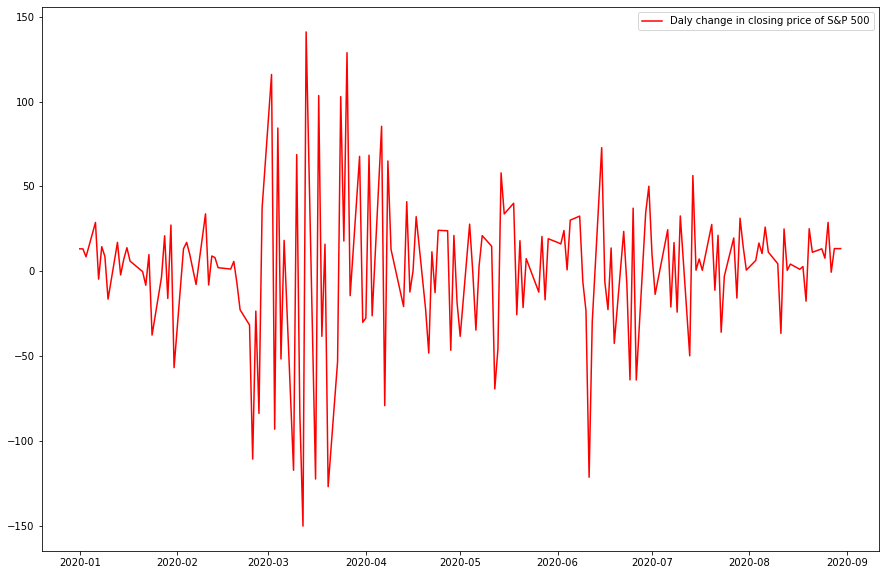

In [76]:

plt.figure(figsize=(15,10))
plt.plot(df_final["Daily_change_stock"],color="r")
plt.legend(["Daly change in closing price of S&P 500"])
plt.savefig("Daily_Change.png")

In [ ]:
df_final.to_excel("Tweets_final_Comp__Ver_3_en.xlsx")
df_final.to_csv("Tweets_final_Comp_Ver_3_en.csv")